In [4]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from openpyxl import Workbook
# # 创建无向图
G = nx.Graph()
# 读取文本文件
with open('email-Eu-core.txt') as f:
    email_list = [tuple(map(int, line.strip().split())) for line in f]
G.add_edges_from(email_list)


该网络不是一个连通图
第1个连通子图：
平均路径长度： 2.586933824816466
集聚系数： {0: 0.2764227642276423, 1: 0.2653061224489796, 2: 0.2978027115474521, 3: 0.38491048593350385, 4: 0.31869137497140243, 5: 0.10700197238658778, 6: 0.15518331226295828, 7: 0.28778467908902694, 8: 0.4470588235294118, 9: 0.42532005689900426, 10: 0.3154486586493987, 11: 0.22917437985931136, 12: 0.3025974025974026, 13: 0.11089951120421507, 14: 0.21578421578421578, 15: 0.3526530612244898, 16: 0.28470936690114773, 17: 0.28593272171253825, 18: 0.30118798043326345, 19: 0.28322981366459626, 20: 0.28482003129890454, 21: 0.24803921568627452, 22: 0.38461538461538464, 23: 0.3427458617332035, 24: 0.38549075391180654, 25: 0.48295454545454547, 26: 0.5208333333333334, 27: 0.36885245901639346, 28: 0.34475537787930705, 29: 0.3935064935064935, 30: 0.4027972027972028, 31: 0.4122340425531915, 32: 0.5473484848484849, 33: 0.5793650793650794, 34: 0.6379310344827587, 35: 0.41228070175438597, 36: 0.46511627906976744, 37: 0.43025210084033616, 38: 0.3959595959595959

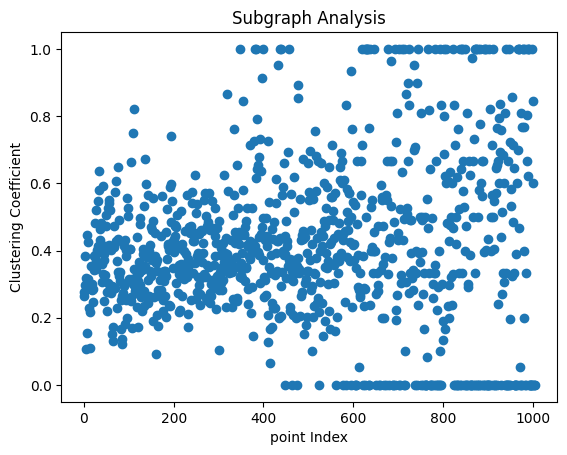

In [6]:
import pandas as pd
from openpyxl import Workbook
wb = Workbook()
ws = wb.active
data = {}
# 检查网络是否为一个连通图
if not nx.is_connected(G):
    print("该网络不是一个连通图")

    # 将网络拆分成多个连通的子图
    subgraphs = list(nx.connected_components(G))

    # 对每个连通子图进行计算
    for i, subgraph in enumerate(subgraphs):
        print("第{}个连通子图：".format(i+1))
        subgraph = G.subgraph(subgraph)
        avg_path_length = nx.average_shortest_path_length(subgraph)
        clustering_coefficient = nx.clustering(subgraph)
        if(avg_path_length != 0):
            data = clustering_coefficient
        print("平均路径长度：", avg_path_length)
        print("集聚系数：", clustering_coefficient)
else:
    # 进行计算
    avg_path_length = nx.average_shortest_path_length(G)
    clustering_coefficient = nx.clustering(G)
    print("该网络的平均路径长度为：", avg_path_length)
    print("该网络的各点集聚系数为：", clustering_coefficient)

ws.append(['point', 'clustering'])
for key,value in data.items():
    ws.append([key, value])





# 保存Excel表格
wb.save('subgraph_data.xlsx')

# 从Excel表格中读取数据
df = pd.read_excel('subgraph_data.xlsx')

# 绘制可视化图形
plt.scatter(df['point'], df['clustering'])
plt.xlabel('point Index')
plt.ylabel('Clustering Coefficient')
plt.title('Subgraph Analysis')
plt.show()

排名前10的节点的度为 [173, 177, 180, 185, 216, 218, 221, 233, 234, 347]


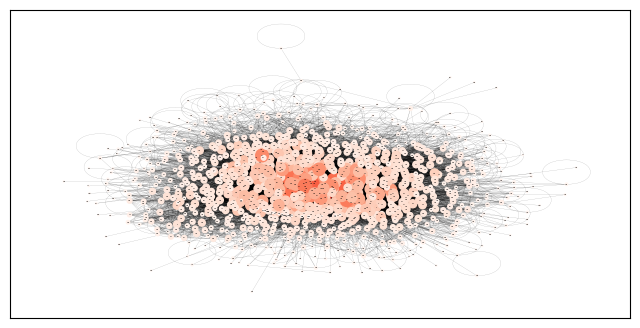

In [3]:
# 画图
# 计算节点的度
degree_dict = dict(G.degree())
keys = degree_dict.keys()
values = sorted([degree_dict.get(i) for i in keys])
print("排名前10的节点的度为",[i for i in values[-10:]])
# 为节点设置颜色和大小
node_color = [degree_dict[n] * 6 for n in G.nodes()]
node_size = [degree_dict[n] * 0.6 for n in G.nodes()]
pos = nx.kamada_kawai_layout(G)
plt.figure(figsize=(8, 4))
nx.draw_networkx_nodes(G, pos, node_color=node_color, node_size=node_size, cmap=plt.cm.Reds)
nx.draw_networkx_edges(G, pos, alpha=0.5,width=0.1)
nx.draw_networkx_labels(G, pos, font_size=1)
# mpl.rcParams['savefig.dpi'] = 600
plt.savefig('network.png', dpi=600)
plt.show()

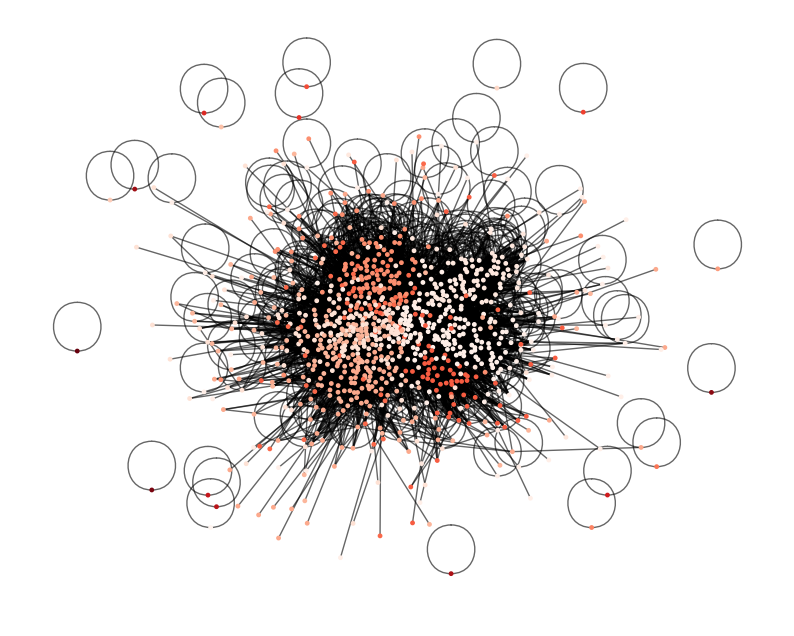

In [4]:
import community.community_louvain as louvain
import matplotlib.pyplot as plt

# 利用模块度最大化算法获取图中的社区
partition = louvain.best_partition(G)

# 绘制社区图
pos = nx.spring_layout(G, k=0.2)
plt.figure(figsize=(10, 8))
plt.axis('off')
nx.draw_networkx_nodes(G, pos, node_size=6, cmap=plt.cm.Reds, node_color=[i * 6 for i in  partition.values()])
nx.draw_networkx_edges(G, pos, alpha=0.6)
plt.show()

In [5]:
# 度 centrality，输出 top 10
deg_cen = nx.degree_centrality(G)
deg_cen_top10 = sorted(deg_cen.items(), key=lambda x: x[1], reverse=True)[:10]
print("Degree centrality top 10:", deg_cen_top10)

# 多级邻居 centrality，输出 top 10
clo_cen = nx.closeness_centrality(G)
clo_cen_top10 = sorted(clo_cen.items(), key=lambda x: x[1], reverse=True)[:10]
print("Closeness centrality top 10:", clo_cen_top10)

# 集聚系数 centrality，输出 top 10
clu_cen = nx.clustering(G)
clu_cen_top10 = sorted(clu_cen.items(), key=lambda x: x[1], reverse=True)[:10]
print("Clustering centrality top 10:", clu_cen_top10)

# 紧密度 centrality，输出 top 10
bet_cen = nx.betweenness_centrality(G)
bet_cen_top10 = sorted(bet_cen.items(), key=lambda x: x[1], reverse=True)[:10]
print("Betweenness centrality top 10:", bet_cen_top10)

Degree centrality top 10: [(160, 0.34561752988047806), (121, 0.23306772908366533), (82, 0.23207171314741035), (107, 0.2201195219123506), (86, 0.21713147410358566), (62, 0.2151394422310757), (434, 0.18426294820717132), (13, 0.17928286852589642), (166, 0.17629482071713148), (183, 0.17231075697211154)]
Closeness centrality top 10: [(160, 0.5738477207559312), (82, 0.5341954459662731), (121, 0.5312586925524948), (107, 0.5237721201913215), (62, 0.5226390274488848), (86, 0.5220743175326786), (434, 0.5159421045130743), (166, 0.5102215215168892), (249, 0.5091462390690137), (64, 0.5067433464881951)]
Clustering centrality top 10: [(348, 1.0), (382, 1.0), (383, 1.0), (398, 1.0), (436, 1.0), (439, 1.0), (456, 1.0), (620, 1.0), (625, 1.0), (628, 1.0)]
Betweenness centrality top 10: [(160, 0.08741473493638795), (86, 0.03778853269115196), (5, 0.030994686545277747), (82, 0.027880741135114222), (121, 0.027841538825800698), (107, 0.024340312182693967), (13, 0.023564989570690153), (377, 0.0231746082366493